## Q1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
data = pd.DataFrame({'Obs':[1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15, 16],
                    'team':['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P'],
                    'points':[18,24,26,34,38,45,48,54,60,73,79,85,94,98,221,223]})
data

,Obs,team,points
0,1,A,18
1,2,B,24
2,3,C,26
3,4,D,34
4,5,E,38
5,6,F,45
6,7,G,48
7,8,H,54
8,9,I,60
9,10,J,73


## Outlier Detection

#### Method 1 : Box plot

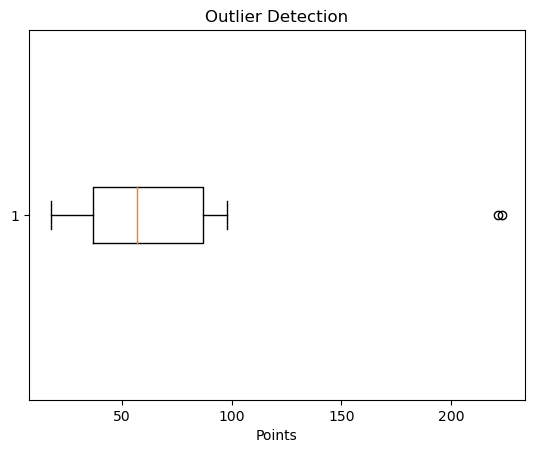

In [34]:
plt.boxplot(data['points'], vert = False)
plt.title("Outlier Detection")
plt.xlabel('Points')
plt.show()

#### Method 2: Zscore

In [35]:
outliers = []
def detect_outliers(data):
    thres = 2
    mean = np.mean(data['points'])
    std = np.std(data['points'])
    for i in data['points']:
        z_score = (i - mean)/ std
        if (np.abs(z_score)> thres):
            outliers.append(i)
    
    return outliers
o = detect_outliers(data)
print("Set of outliers :", o)

Set of outliers : [221, 223]


## Treatment to outliers

#### Quantile Based flooring and Capping

In [36]:
tenth_percentile = np.percentile(data['points'], 10)
ninetieth_percentile = np.percentile(data['points'], 90)
b = np.where(data['points']<tenth_percentile, tenth_percentile, data['points'])
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
data['Treated_points']=b
print('Treated Outliers :\n', data)

Treated Outliers :
     Obs team  points  Treated_points
0     1    A      18            25.0
1     2    B      24            25.0
2     3    C      26            26.0
3     4    D      34            34.0
4     5    E      38            38.0
5     6    F      45            45.0
6     7    G      48            48.0
7     8    H      54            54.0
8     9    I      60            60.0
9    10    J      73            73.0
10   11    K      79            79.0
11   12    L      85            85.0
12   13    M      94            94.0
13   14    N      98            98.0
14   15    O     221           159.5
15   16    P     223           159.5


{'whiskers': [<matplotlib.lines.Line2D at 0x2d4da702790>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4da703d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4da701d50>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4da738f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4d46b7610>],
 'means': []}

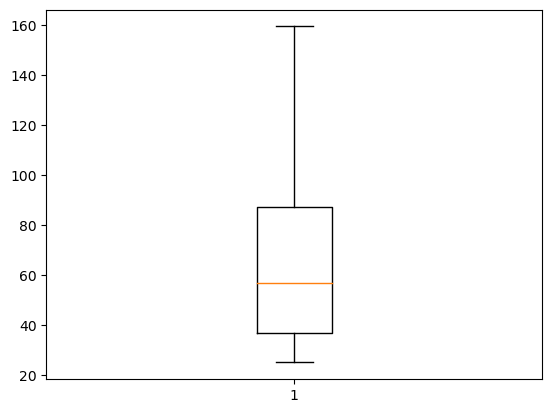

In [37]:
plt.boxplot(data['Treated_points'])

In [41]:

median = np.median(data['points'])
data['points'] = data['points'].copy()  # Create a copy of the 'points' array
for i in o:
    data['Fixed points'] = np.where(data['points']==i,median , data['points'])
data

,Obs,team,points,Treated_points,Fixed points
0,1,A,18,25.0,18.0
1,2,B,24,25.0,24.0
2,3,C,26,26.0,26.0
3,4,D,34,34.0,34.0
4,5,E,38,38.0,38.0
5,6,F,45,45.0,45.0
6,7,G,48,48.0,48.0
7,8,H,54,54.0,54.0
8,9,I,60,60.0,60.0
9,10,J,73,73.0,73.0


## Q2

In [56]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

In [55]:
data = {
    "Ph": [0.7, 0.22, 0.62, 0.57,0.62, 0.6,0.46, 0.29, 0.55, 0.27],
    "Sh": [27, 6, 19, 14,9, 29,9, 16, 22,6],
    "Sa": [6, 14, 10, 8,9, 4,14, 9, 9, 18],
    "Th": [10, 2, 6, 4,4, 2,4,6, 6, 3],
    "Ta": [3, 4, 5, 6, 1,0,5,2,1,6],
    "Gh": [4, 0, 2, 0, 1, 0, 3, 1, 4, 0],
    "Ga": [3, 2, 3, 3,0,0,3,0,0, 2]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
df

,Ph,Sh,Sa,Th,Ta,Gh,Ga
0,0.70,27,6,10,3,4,3
1,0.22,6,14,2,4,0,2
2,0.62,19,10,6,5,2,3
3,0.57,14,8,4,6,0,3
4,0.62,9,9,4,1,1,0
5,0.60,29,4,2,0,0,0
6,0.46,9,14,4,5,3,3
7,0.29,16,9,6,2,1,0
8,0.55,22,9,6,1,4,0
9,0.27,6,18,3,6,0,2


In [57]:
model = ols('Ph ~ Sh+Sa+Th+Ta+Gh+Ga', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Ph   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     1.349
Date:                Fri, 19 Apr 2024   Prob (F-statistic):              0.435
Time:                        00:07:25   Log-Likelihood:                 10.557
No. Observations:                  10   AIC:                            -7.113
Df Residuals:                       3   BIC:                            -4.995
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8945      0.449      1.993      0.1

C:\Users\kings\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [58]:
durbin_watson(model.resid)

2.0327130037562475

The Durbin-Watson test statistic ranges from 0 to 4. A value of 2 means that there is no autocorrelation in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from more than 2 to 4 indicate negative autocorrelation.



## Q3

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
data= pd.read_excel('Stock_Market_data.xlsx')
data

,Date,Open,High,Low,Close,Volume
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-06-04 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-07-04 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-08-04 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [4]:
open_data= data['Open'][:100]
open_data

0     40.60
1     40.66
2     40.34
3     41.61
4     41.48
      ...  
95    46.81
96    46.84
97    46.78
98    46.07
99    45.30
Name: Open, Length: 100, dtype: float64

##### Autocorrelation Function (ACF)

<Figure size 1200x400 with 0 Axes>

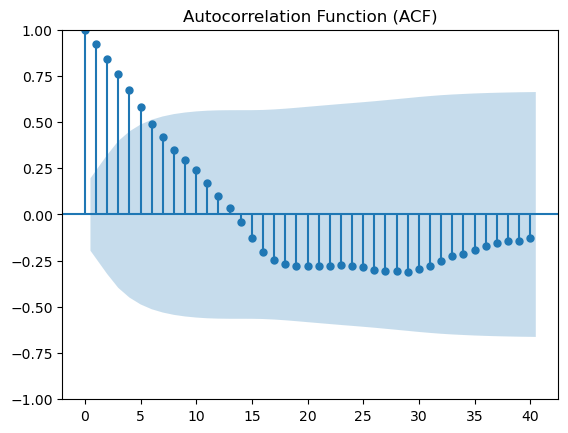

In [5]:
plt.figure(figsize=(12, 4))
plot_acf(open_data, lags=40, title='Autocorrelation Function (ACF)')
plt.show()

###### Autoregressive

In [14]:
# Autoregressive modeling
model = ARIMA(open_data,order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -93.602
Date:                Fri, 19 Apr 2024   AIC                            193.205
Time:                        00:56:36   BIC                            200.990
Sample:                             0   HQIC                           196.355
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7219      0.160     -4.516      0.000      -1.035      -0.409
ma.L1          0.8900      0.127      7.031      0.000       0.642       1.138
sigma2         0.3869      0.041      9.445      0.0

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [42]:
sample = data[:100]
print(sample)

                   Date   Open   High    Low  Close    Volume
0   2015-01-04 16:00:00  40.60  40.76  40.31  40.72  36865322
1   2015-02-04 16:00:00  40.66  40.74  40.12  40.29  37487476
2   2015-06-04 16:00:00  40.34  41.78  40.18  41.55  39223692
3   2015-07-04 16:00:00  41.61  41.91  41.31  41.53  28809375
4   2015-08-04 16:00:00  41.48  41.69  41.04  41.42  24753438
..                  ...    ...    ...    ...    ...       ...
95   8/17/2015 16:00:00  46.81  47.45  46.57  47.32  21099746
96   8/18/2015 16:00:00  46.84  47.43  46.70  47.27  23574104
97   8/19/2015 16:00:00  46.78  47.08  46.30  46.61  31485511
98   8/20/2015 16:00:00  46.07  46.47  45.66  45.66  36238227
99   8/21/2015 16:00:00  45.30  45.48  43.07  43.07  70053084

[100 rows x 6 columns]


##### Fitting of non linear regression models 

In [44]:
from scipy.optimize import curve_fit

<Axes: >

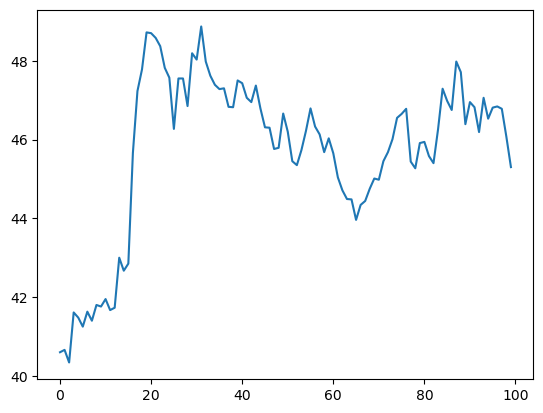

In [48]:
sample['Open'].plot()

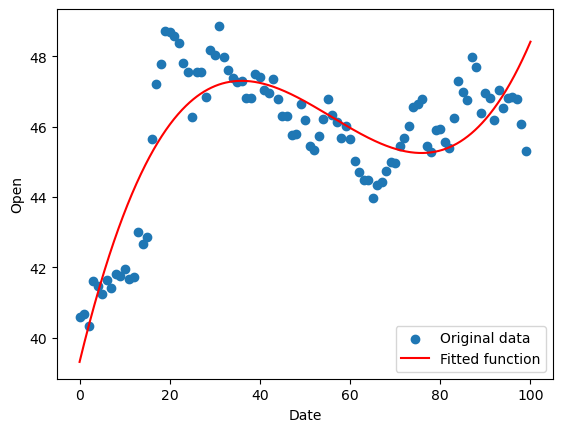

In [46]:
# Define the cubic function
def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the cubic function to the data
popt, pcov = curve_fit(cubic_func, sample.index, sample['Open'])

# Generate x values for the fitted function
x_data = np.linspace(0, len(sample.index), 1000)

# Generate y values for the fitted function
y_data = cubic_func(x_data, *popt)

# Plot the original data
plt.scatter(sample.index, sample['Open'], label='Original data')

# Plot the fitted function
plt.plot(x_data, y_data, 'r', label='Fitted function')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()

# Show the plot
plt.show()
